## Importing libraries

In [8]:
import numpy as np
import torch, torchvision
import matplotlib.pyplot as plt

## Loading MNIST Dataset

In [9]:
T = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
training_data = torchvision.datasets.MNIST('mnist_data', train=True, download=True, transform=T)

## Displaying Image

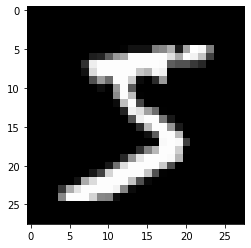

In [12]:
plt.imshow(training_data[0][0][0], cmap='gray')

## Forming Kernels

In [13]:
kernel_horizontal_1 = [[1,1,1],
                       [0,0,0],
                       [-1,-1,-1]]

kernel_horizontal_2 = [[-1,-1,-1],
                       [0,0,0],
                       [1,1,1]]

kernel_vertical_1 = [[1,0,-1],
                     [1,0,-1],
                     [1,0,-1]]

kernel_vertical_2 = [[-1,0,1],
                     [-1,0,1],
                     [-1,0,1]]

## Filter Method

In [20]:
def conv2d(X, W, p=(0, 0), s=(1, 1)):
    W_rot = np.array(W)[::-1,::-1]
    X_orig = np.array(X)
    n1 = X_orig.shape[0] + 2*p[0]
    n2 = X_orig.shape[1] + 2*p[1]
    X_padded = np.zeros(shape=(n1, n2))
    X_padded[p[0]:p[0]+X_orig.shape[0],
             p[1]:p[1]+X_orig.shape[1]] = X_orig
    res = []
    for i in range(0,int((X_padded.shape[0] - W_rot.shape[0])/s[0])+1, s[0]):
        res.append([])
        for j in range(0, int((X_padded.shape[1] - W_rot.shape[1])/s[1])+1, s[1]):
            X_sub = X_padded[i:i+W_rot.shape[0],
                             j:j+W_rot.shape[1]]
            res[-1].append(np.sum(X_sub * W_rot))
    return(np.array(res))

## Displaying Filtered Images

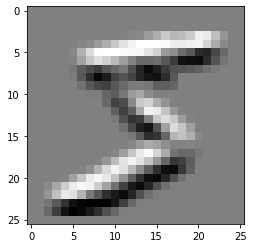

In [21]:
plt.imshow(conv2d(training_data[0][0][0], kernel_horizontal_1), cmap='gray')

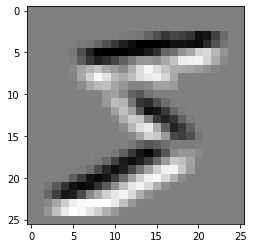

In [22]:
plt.imshow(conv2d(training_data[0][0][0], kernel_horizontal_2), cmap='gray')

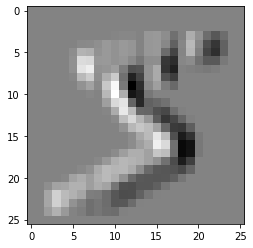

In [23]:
plt.imshow(conv2d(training_data[0][0][0], kernel_vertical_1), cmap='gray')

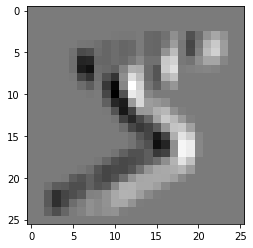

In [24]:
plt.imshow(conv2d(training_data[0][0][0], kernel_vertical_2), cmap='gray')

## 5x5 Kernel Filtering

In [25]:
kernel_horizontal_1_5x5 = [[1,1,1,1,1],
                           [0,0,0,0,0],
                           [0,0,0,0,0],
                           [0,0,0,0,0],
                           [-1,-1,-1,-1,-1]]

kernel_horizontal_2_5x5 = [[1,1,1,1,1],
                           [1,1,1,1,1],
                           [0,0,0,0,0],
                           [-1,-1,-1,-1,-1],
                           [-1,-1,-1,-1,-1]]

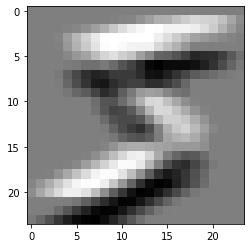

In [26]:
plt.imshow(conv2d(training_data[0][0][0], kernel_horizontal_1_5x5), cmap='gray')

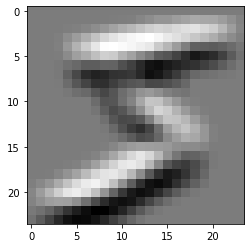

In [27]:
plt.imshow(conv2d(training_data[0][0][0], kernel_horizontal_2_5x5), cmap='gray')

## 7x7 Kernel Filtering

In [33]:
kernel_vertical_1_7x7 = [[1,0,0,0,0,0,-1],
                        [1,0,0,0,0,0,-1],
                        [1,0,0,0,0,0,-1],
                        [1,0,0,0,0,0,-1],
                        [1,0,0,0,0,0,-1],
                        [1,0,0,0,0,0,-1],
                        [1,0,0,0,0,0,-1]]

kernel_vertical_2_7x7 = [[1,1,0,0,0,-1,-1],
                        [1,1,0,0,0,-1,-1],
                        [1,1,0,0,0,-1,-1],
                        [1,1,0,0,0,-1,-1],
                        [1,1,0,0,0,-1,-1],
                        [1,1,0,0,0,-1,-1],
                        [1,1,0,0,0,-1,-1]]

kernel_vertical_3_7x7 = [[1,1,1,0,0,-1,-1],
                        [1,1,1,0,0,-1,-1],
                        [1,1,1,0,0,-1,-1],
                        [1,1,1,0,0,-1,-1],
                        [1,1,1,0,0,-1,-1],
                        [1,1,1,0,0,-1,-1],
                        [1,1,1,0,0,-1,-1]]

kernel_vertical_4_7x7 = [[1,1,1,1,1,-1,-1],
                        [1,1,1,1,1,-1,-1],
                        [1,1,1,1,1,-1,-1],
                        [1,1,1,1,1,-1,-1],
                        [1,1,1,1,1,-1,-1],
                        [1,1,1,1,1,-1,-1],
                        [1,1,1,1,1,-1,-1]]

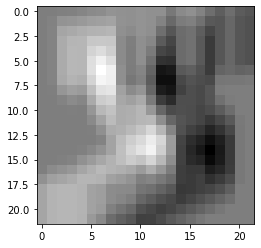

In [34]:
plt.imshow(conv2d(training_data[0][0][0], kernel_vertical_1_7x7), cmap='gray')

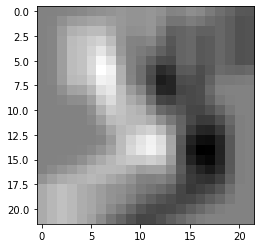

In [35]:
plt.imshow(conv2d(training_data[0][0][0], kernel_vertical_2_7x7), cmap='gray')

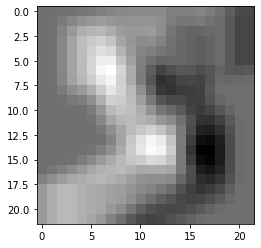

In [36]:
plt.imshow(conv2d(training_data[0][0][0], kernel_vertical_3_7x7), cmap='gray')

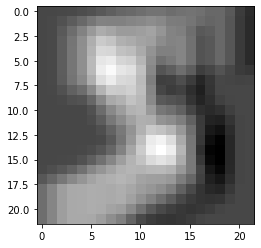

In [37]:
plt.imshow(conv2d(training_data[0][0][0], kernel_vertical_4_7x7), cmap='gray')